In [1]:
%pylab inline
from PIL import Image, ImageOps
from scipy import ndimage

Populating the interactive namespace from numpy and matplotlib


In [35]:
im = Image.open("peppers.png")

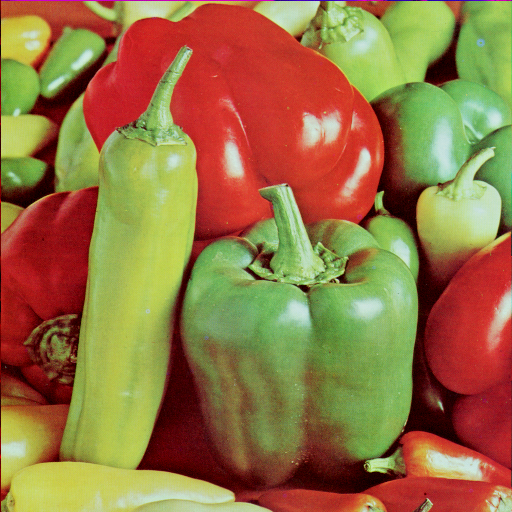

In [36]:
display(im)

In [37]:
im_arr = array(im)

In [38]:
im_arr.dtype

dtype('uint8')

In [39]:
gray = ((0.3*im_arr[:,:,0]+0.59*im_arr[:,:,1]+0.11*im_arr[:,:,2])).astype('uint8')

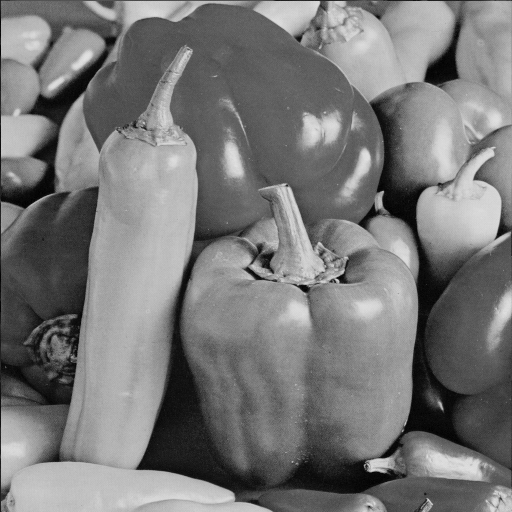

In [40]:
display(Image.fromarray(gray))

In [41]:
im_gray = Image.fromarray(gray)
im_autocontrast = ImageOps.autocontrast(im_gray, 10)

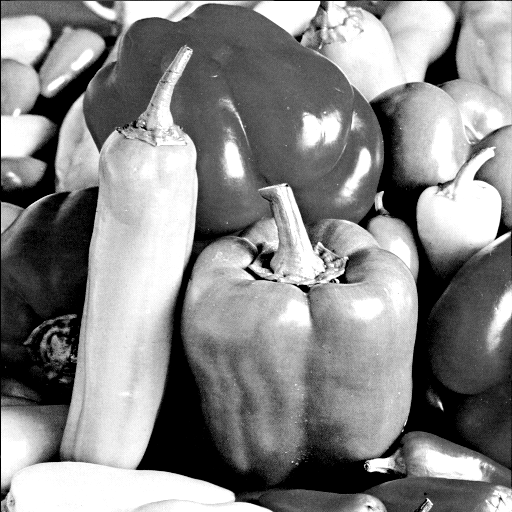

In [42]:
display(im_autocontrast)

In [43]:
gray_autocontrast = array(im_autocontrast)

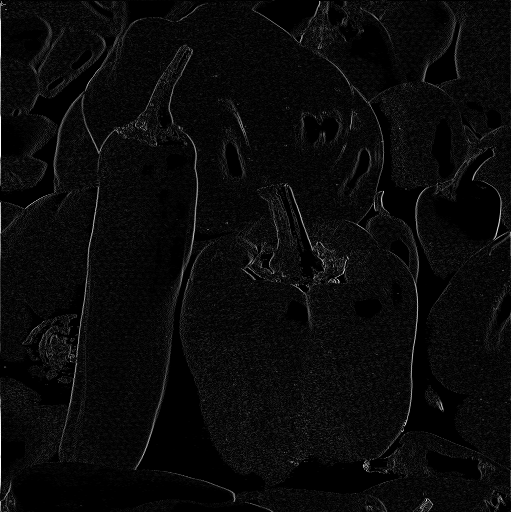

In [63]:
dx = abs(1.0*gray_autocontrast[:,:-1]-1.0*gray_autocontrast[:,1:]).astype('uint8')
display(Image.fromarray(dx))

In [55]:
from ipywidgets import interact

In [64]:
@interact(t=(0,255,1))
def threshold(t=128):
    dx = abs(1.0*gray_autocontrast[:,:-1]-1.0*gray_autocontrast[:,1:]).astype('uint8')
    dx[dx<t] = 0
    dx[dx>=t] = 255

    display(Image.fromarray(dx))

interactive(children=(IntSlider(value=128, description='t', max=255), Output()), _dom_classes=('widget-interac…

In [59]:
dx[100,:10]

array([  0,   0, 255,   0, 255, 255,   0, 255, 255, 255], dtype=uint8)

In [60]:
gray_autocontrast[100,:10]

array([  0, 179, 160, 185, 151, 153, 157, 155, 162, 171], dtype=uint8)

In [47]:
dy = gray_autocontrast[:-1,:]-gray_autocontrast[1:,:]

In [65]:
@interact(t=(0,255,1))
def threshold(t=128):
    dy = abs(1.0*gray_autocontrast[:-1,:]-1.0*gray_autocontrast[1:,:]).astype('uint8')
    dy[dy<t] = 0
    dy[dy>=t] = 255

    display(Image.fromarray(dy))

interactive(children=(IntSlider(value=128, description='t', max=255), Output()), _dom_classes=('widget-interac…

In [68]:
@interact(t=(0,255,1))
def threshold(t=128):
    w,h = gray_autocontrast.shape
    result = zeros((w-1,h-1), dtype='uint8')
    dx = abs(1.0*gray_autocontrast[:-1,:-1]-1.0*gray_autocontrast[:-1,1:]).astype('uint8')
    result[dx>=t] = 255

    dy = abs(1.0*gray_autocontrast[:-1,:-1]-1.0*gray_autocontrast[1:,:-1]).astype('uint8')
    result[dy>=t] = 255

    display(Image.fromarray(result))

interactive(children=(IntSlider(value=128, description='t', max=255), Output()), _dom_classes=('widget-interac…

In [69]:
blurred = ndimage.gaussian_filter(gray_autocontrast, 2.0)

In [70]:
blurred.dtype

dtype('uint8')

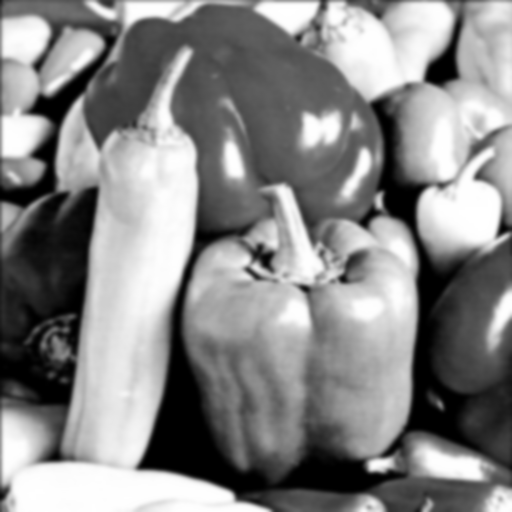

In [71]:
display(Image.fromarray(blurred))